#Predicting House Prices with Linear Regression

In [106]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
df = pd.DataFrame(pd.read_csv("Housing.csv"))

In [108]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [110]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

## Data Cleaning

In [67]:
df.isnull().sum()*100/df.shape[0]


price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

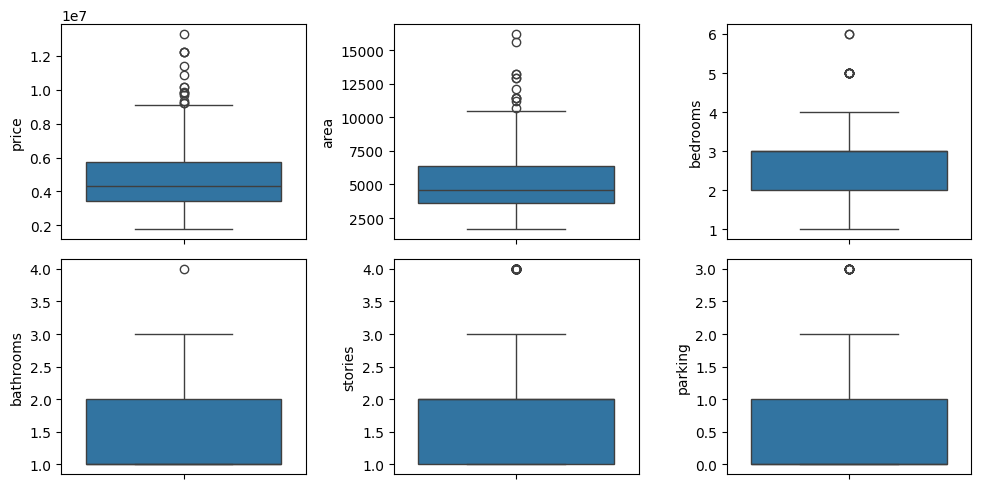

In [68]:

fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(df['parking'], ax = axs[1,2])

plt.tight_layout()

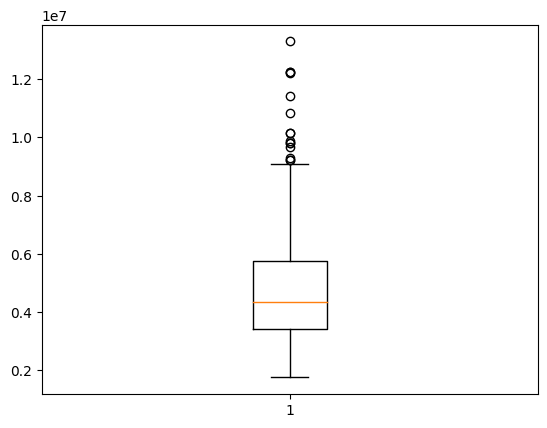

In [69]:
plt.boxplot(df.price)
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]

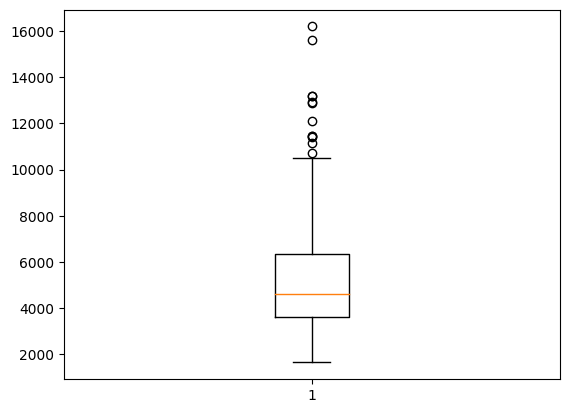

In [70]:
# outlier treatment for area
plt.boxplot(df.area)
Q1 = df.area.quantile(0.25)
Q3 = df.area.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(df.area >= Q1 - 1.5*IQR) & (df.area <= Q3 + 1.5*IQR)]

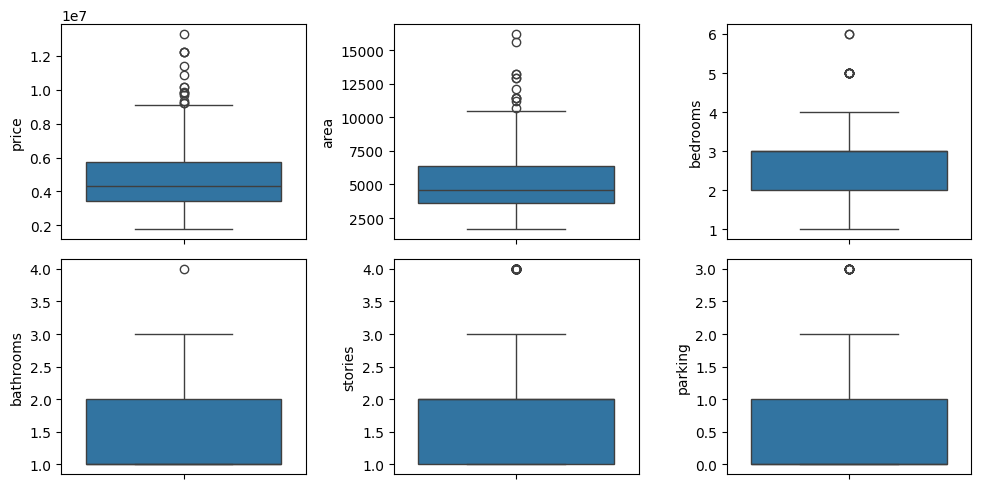

In [71]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(df['parking'], ax = axs[1,2])

plt.tight_layout()

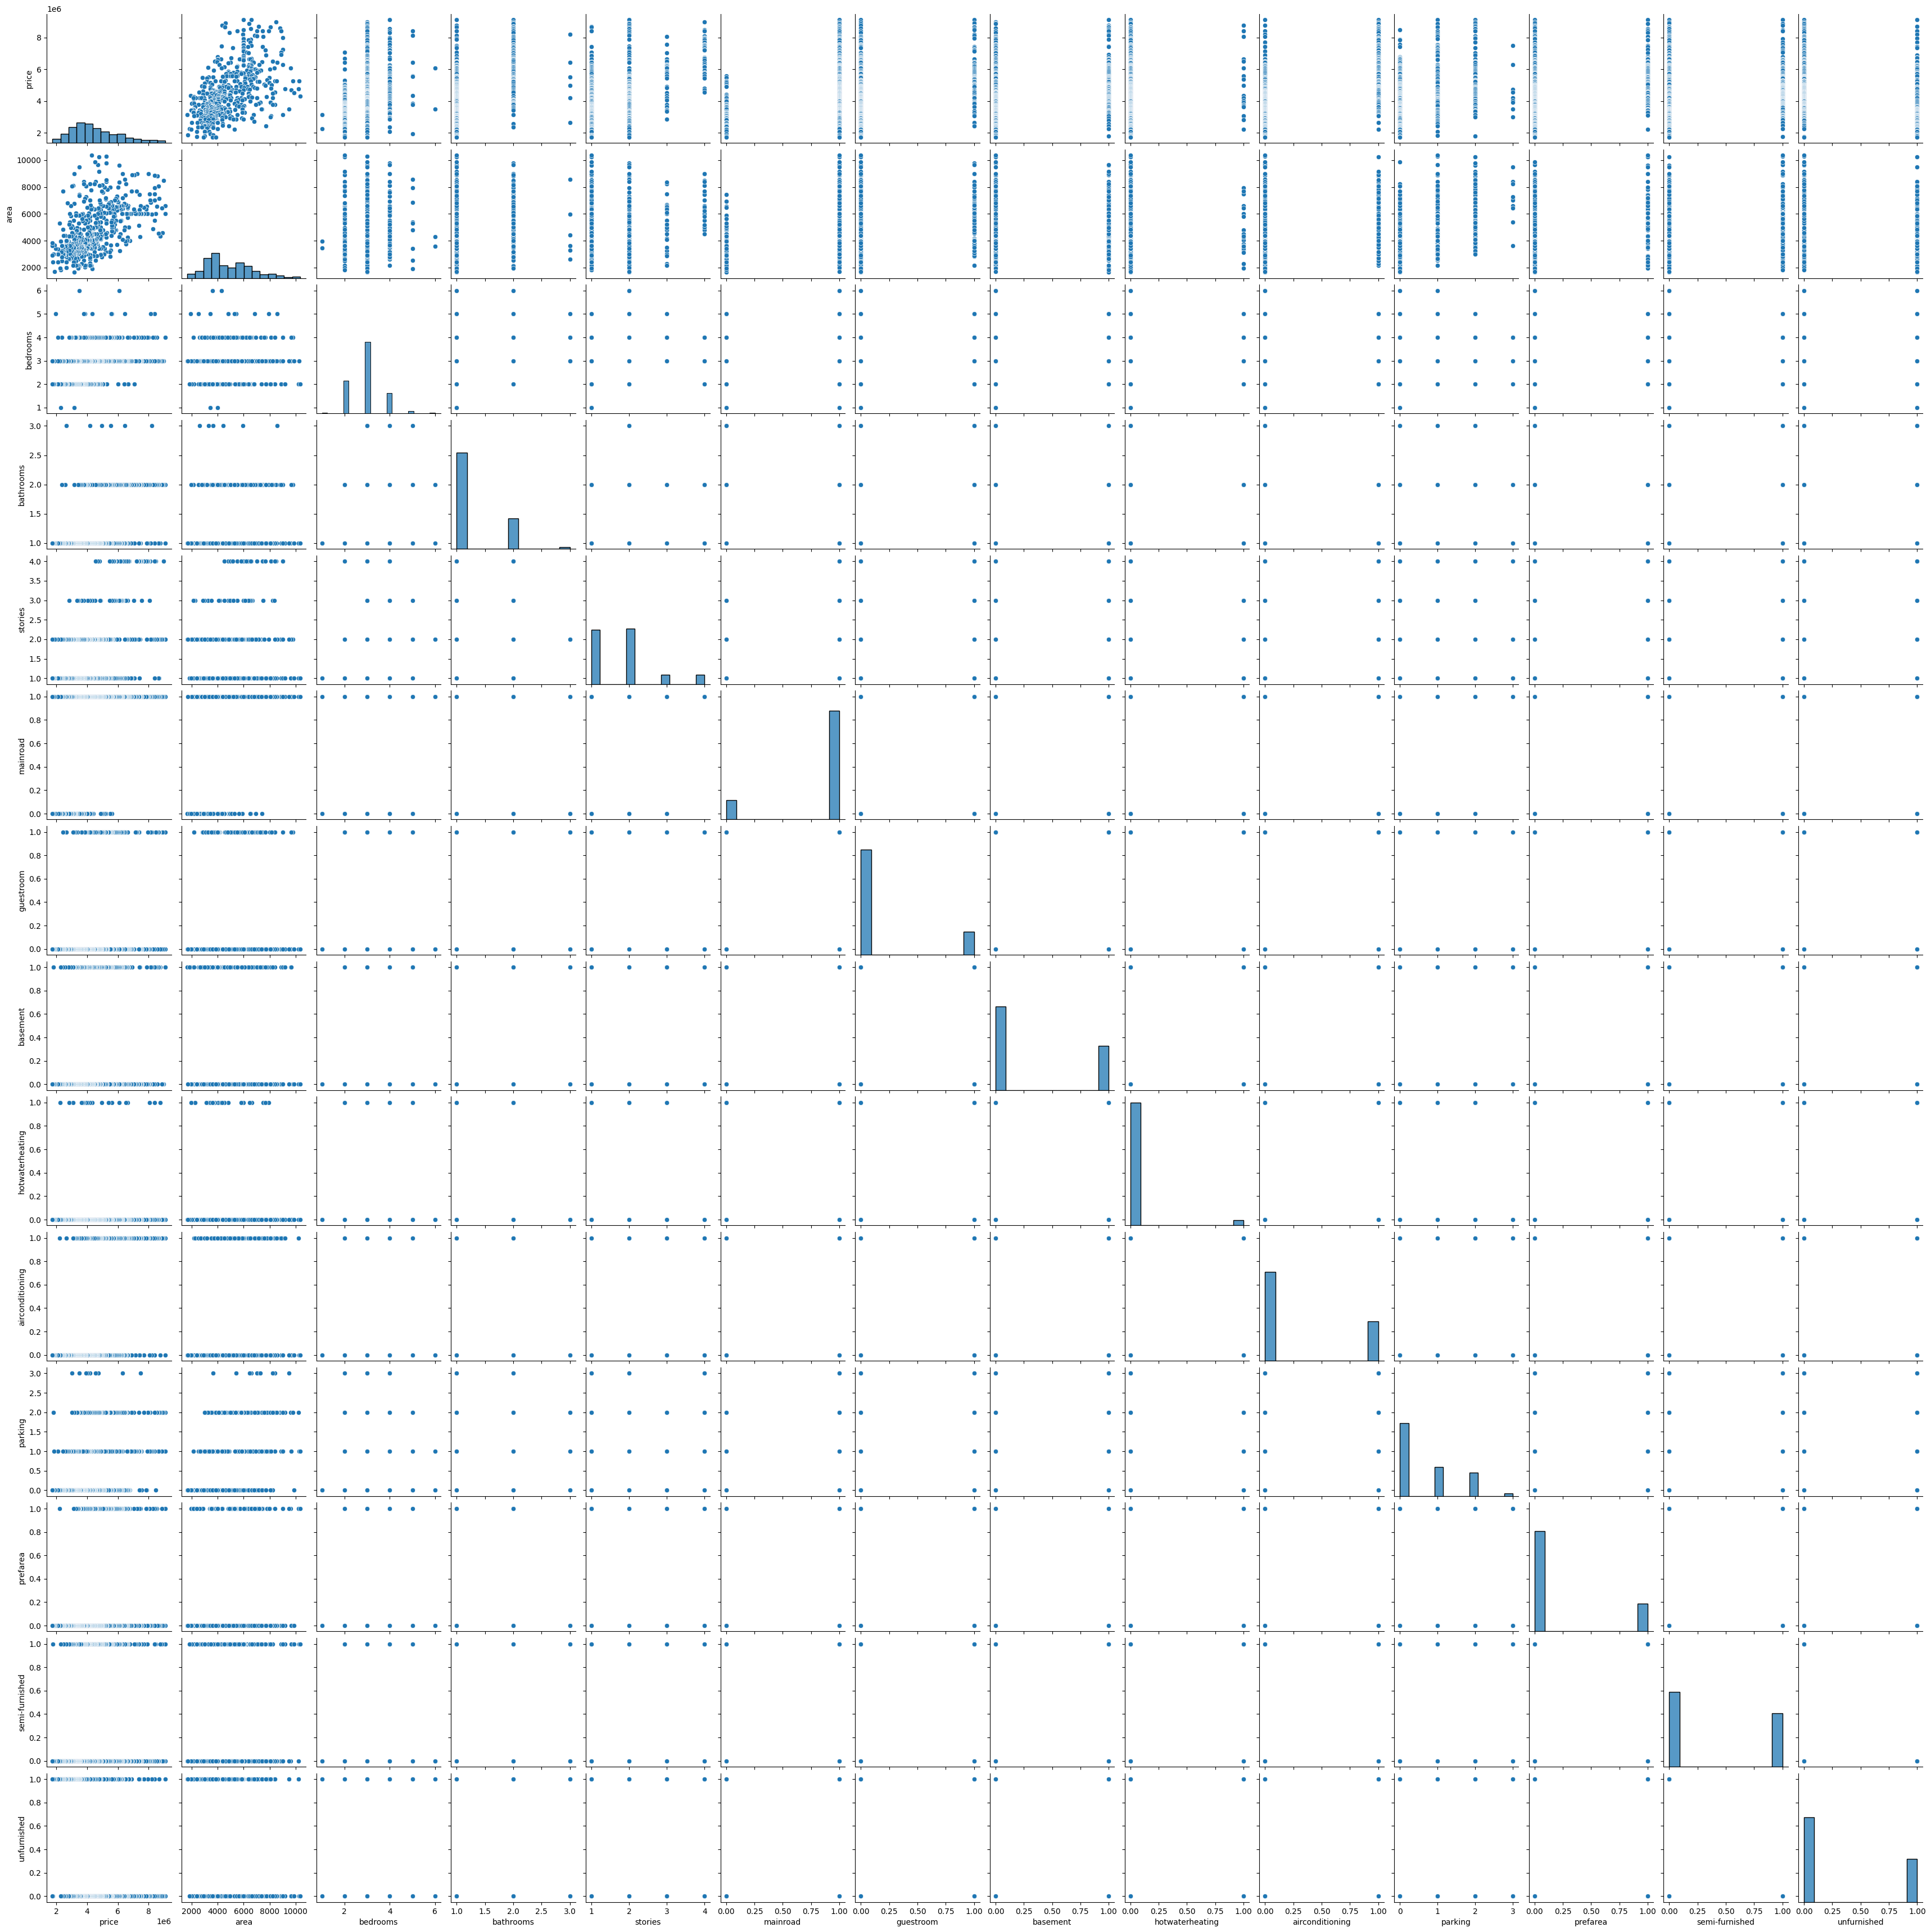

In [72]:
sns.pairplot(housing)
plt.show()

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

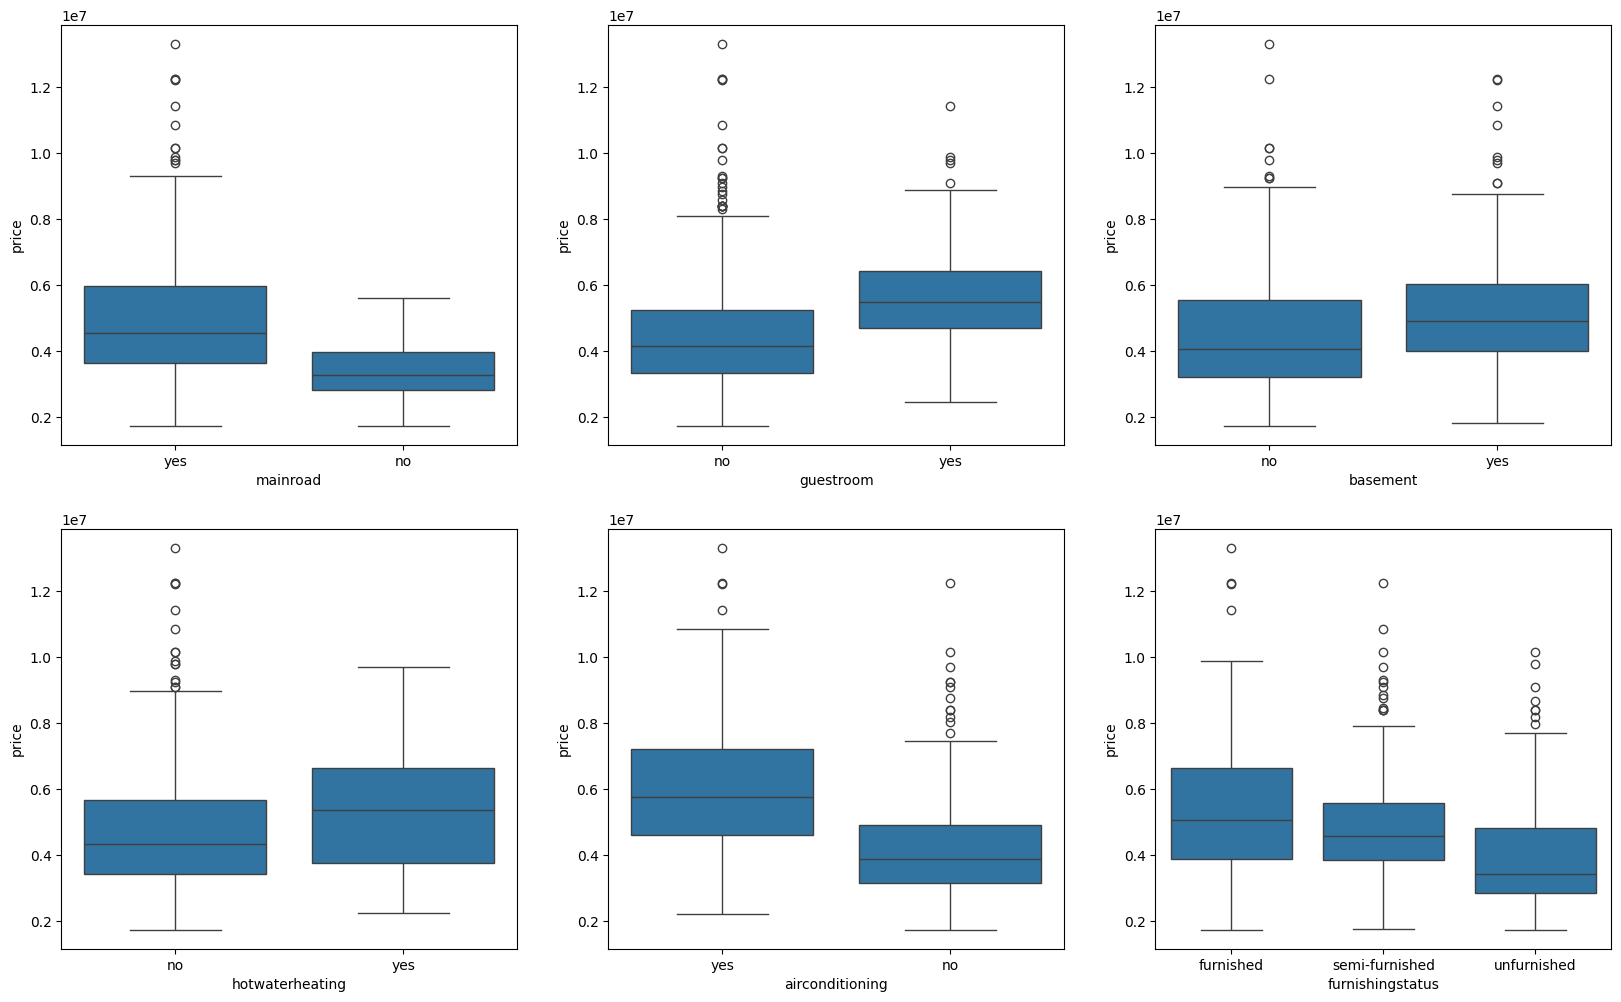

In [74]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data =df)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = df)
plt.show()

We can also visualise some of these categorical features parallely by using the `hue` argument. Below is the plot for `furnishingstatus` with `airconditioning` as the hue.

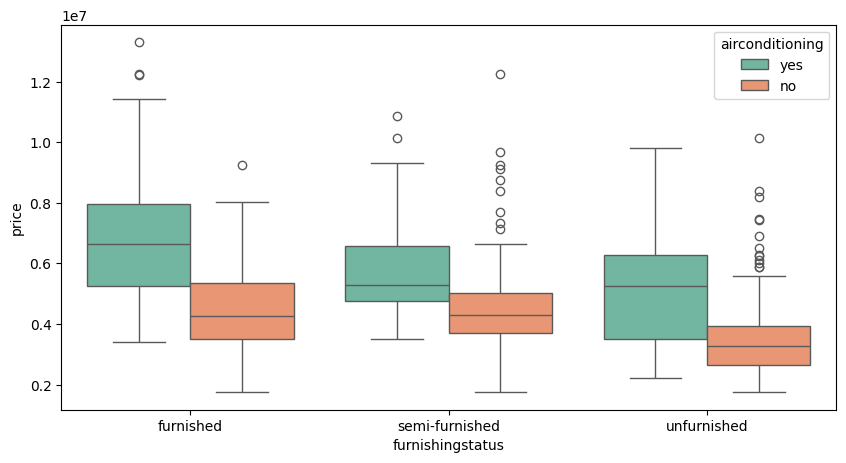

In [77]:
plt.figure(figsize = (10, 5),)
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = df,palette='Set2')
plt.show()

## Data Preparation

In [78]:


varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

In [79]:
# Check the housing dataframe now

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,9100000,6000,4,1,2,NaN,NaN,NaN,NaN,NaN,2,NaN,1,0
16,9100000,6600,4,2,2,NaN,NaN,NaN,NaN,NaN,1,NaN,0,1
17,8960000,8500,3,2,4,NaN,NaN,NaN,NaN,NaN,2,NaN,0,0
18,8890000,4600,3,2,2,NaN,NaN,NaN,NaN,NaN,2,NaN,0,0
19,8855000,6420,3,2,2,NaN,NaN,NaN,NaN,NaN,1,NaN,1,0


### Dummy Variables

In [82]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'
status = pd.get_dummies(df['furnishingstatus'])

In [83]:
# Check what the dataset 'status' looks like
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [84]:


status = pd.get_dummies(df['furnishingstatus'], drop_first = True)

In [85]:
# Add the results to the original housing dataframe

housing = pd.concat([housing, status], axis = 1)

In [86]:
# Now let's see the head of our dataframe.

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,semi-furnished,unfurnished
15,9100000.0,6000.0,4.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,0.0,1,0
16,9100000.0,6600.0,4.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,1.0,0,1
17,8960000.0,8500.0,3.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,0.0,0.0,0,0
18,8890000.0,4600.0,3.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,0.0,0.0,0,0
19,8855000.0,6420.0,3.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,0.0,1,0


In [24]:
# Drop 'furnishingstatus' as we have created the dummies for it

housing.drop(['furnishingstatus'], axis = 1, inplace = True)

In [98]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,semi-furnished,unfurnished
15,9100000.0,6000.0,4.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,0.0,1,0
16,9100000.0,6600.0,4.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,1.0,0,1
17,8960000.0,8500.0,3.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,0.0,0.0,0,0
18,8890000.0,4600.0,3.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,0.0,0.0,0,0
19,8855000.0,6420.0,3.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,0.0,1,0


### Splitting the Data into Training and Testing Sets

In [99]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
x_train, y_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [100]:
from sklearn.preprocessing import MinMaxScaler

In [101]:
scaler = MinMaxScaler()

In [ ]:
x_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [95]:
df_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
148,0.526907,0.4,0.0,0.666667,1,0,0,0,0,0.000000,1,1,0
236,0.114134,0.2,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
356,0.072738,0.8,0.5,0.000000,0,0,1,0,1,0.333333,0,0,0
425,0.151390,0.2,0.0,0.000000,1,0,1,0,0,0.666667,0,0,0
516,0.157895,0.2,0.0,0.000000,0,1,0,0,0,0.333333,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.470727,0.2,0.0,0.000000,1,0,0,0,1,0.333333,0,0,1
307,0.257244,0.4,0.0,0.333333,1,0,0,0,0,0.666667,0,1,0
72,0.368421,0.4,0.0,1.000000,1,0,0,0,1,0.000000,1,0,1
377,0.111768,0.4,0.5,0.333333,0,0,1,0,0,0.000000,1,0,1


In [30]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
148,0.523810,0.526907,0.4,0.0,0.666667,1,0,0,0,0,0.000000,1,1,0
236,0.390476,0.114134,0.2,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
356,0.275238,0.072738,0.8,0.5,0.000000,0,0,1,0,1,0.333333,0,0,0
425,0.219048,0.151390,0.2,0.0,0.000000,1,0,1,0,0,0.666667,0,0,0
516,0.095238,0.157895,0.2,0.0,0.000000,0,1,0,0,0,0.333333,0,0,1


In [31]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,0.383701,0.350081,0.390582,0.127424,0.268698,0.875346,0.168975,0.349030,0.038781,0.313019,0.218837,0.207756,0.476454,0.304709
std,0.209712,0.207184,0.149146,0.224465,0.287833,0.330784,0.375250,0.477325,0.193341,0.464366,0.287286,0.406264,0.500138,0.460923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.237143,0.189829,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.338095,0.295092,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.514286,0.491425,0.400000,0.000000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


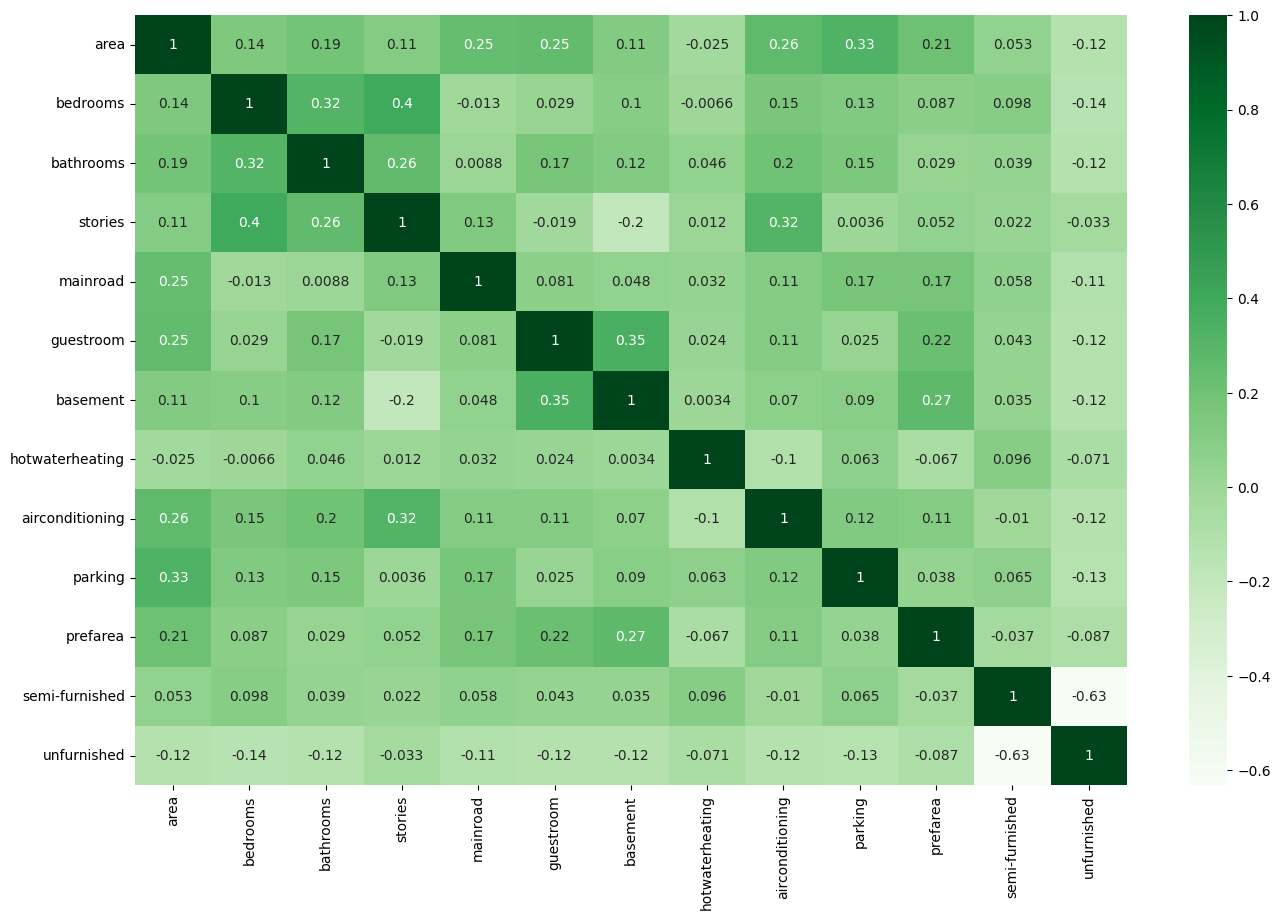

In [111]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="Greens")
plt.show()

As you might have noticed, `area` seems to the correlated to `price` the most. Let's see a pairplot for `area` vs `price`.

### Dividing into X and Y sets for the model building

In [33]:
y_train = df_train.pop('price')
X_train = df_train

## Model Building

In [34]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [35]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [38]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=lm, n_features_to_select=6)  # running RFE
rfe = rfe.fit(X_train, y_train)


In [40]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', False, 7),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', False, 5),
 ('guestroom', False, 6),
 ('basement', False, 4),
 ('hotwaterheating', False, 2),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 8),
 ('unfurnished', False, 3)]

In [41]:
col = X_train.columns[rfe.support_]
col

Index(['area', 'bathrooms', 'stories', 'airconditioning', 'parking',
       'prefarea'],
      dtype='object')

In [42]:
X_train.columns[~rfe.support_]

Index(['bedrooms', 'mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'semi-furnished', 'unfurnished'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [43]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [44]:
# Adding a constant variable
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [45]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [46]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     92.83
Date:                Thu, 14 Mar 2024   Prob (F-statistic):           1.31e-69
Time:                        15:35:24   Log-Likelihood:                 222.77
No. Observations:                 361   AIC:                            -431.5
Df Residuals:                     354   BIC:                            -404.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1097      0.015     

In [47]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,4.51
1,area,1.24
4,airconditioning,1.20
3,stories,1.17
5,parking,1.14
2,bathrooms,1.12
6,prefarea,1.05


## Residual Analysis of the train data

In [49]:
y_train_price = lm.predict(X_train_rfe)

In [50]:
res = (y_train_price - y_train)

In [51]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

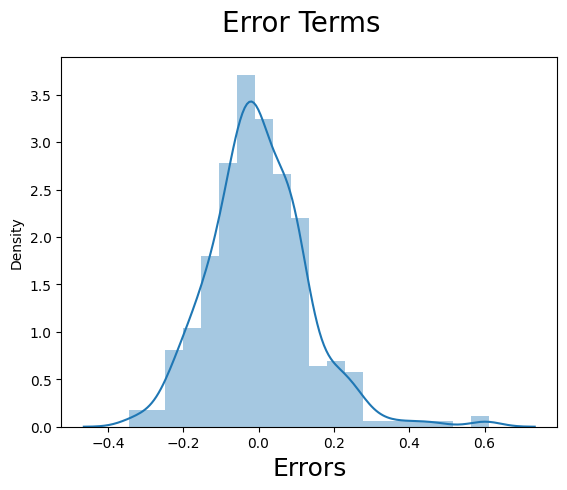

In [52]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label

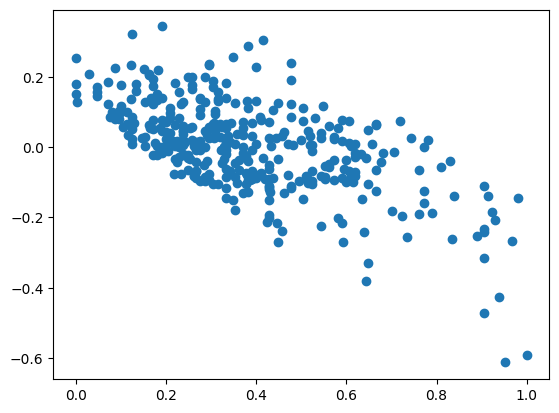

In [53]:
plt.scatter(y_train,res)
plt.show()

In [54]:
# There may be some relation in the error terms.

## Model Evaluation

#### Applying the scaling on the test sets

In [55]:
num_vars = ['area','stories', 'bathrooms', 'airconditioning', 'prefarea','parking','price']

In [56]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [57]:
y_test = df_test.pop('price')
X_test = df_test

In [58]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [59]:
# Now let's use our model to make predictions.

In [60]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_rfe = X_test[X_train_rfe.columns]

In [61]:
# Making predictions
y_pred = lm.predict(X_test_rfe)

In [62]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5791247774397739

Text(0, 0.5, 'y_pred')

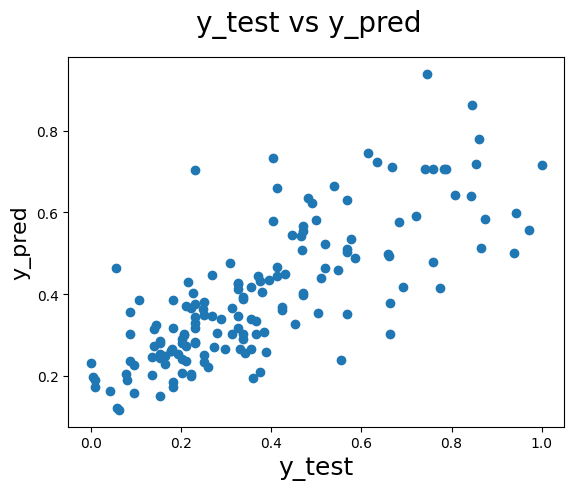

In [63]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label



The equation of our best fitted line is:

$ price = 0.35  \times  area + 0.20  \times  bathrooms + 0.19 \times stories+ 0.10 \times airconditioning + 0.10 \times parking + 0.11 \times prefarea $
